In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #ez hogy a rákban nem a defaultja a jupyternek?
from functions import *

In [3]:
listPoliticalGroups()

array(['EPP', 'ECR', 'ID', 'Greens/EFA', 'RE', 'S&D', 'NI', 'GUE/NGL', ''],
      dtype=object)

In [4]:
getMEPDataFromID("124704")

{'OfficialMEPID': '124704',
 'MEPName': 'Stanislav POLČÁK',
 'MemberState': 'Czechia',
 'EPGroup': 'EPP',
 'NationalParty': 'Mayors and Independents'}

In [5]:
print(createNxGraph())

Graph with 259357 nodes and 750578 edges


In [6]:
# Here's all the MEPs we have data for
listMEPs()

array(['Stanislav POLČÁK', 'Anna ZALEWSKA', 'Catherine GRISET',
       'Bas EICKHOUT', 'Martin HOJSÍK', 'Eric ANDRIEU', 'Pascal CANFIN',
       'Adina-Ioana VĂLEAN', 'César LUENA',
       'Cristina MAESTRE MARTÍN DE ALMAGRO', 'Javi LÓPEZ',
       'Nicolás GONZÁLEZ CASARES', 'Ivan Vilibor SINČIĆ',
       'Joanna KOPCIŃSKA', 'Maria SPYRAKI', 'Véronique TRILLET-LENOIR',
       'Maria da Graça CARVALHO', 'Carlo FIDANZA', 'Maria GRAPINI',
       'John HOWARTH', 'Jiří POSPÍŠIL', 'Eugen JURZYCA', 'Adam BIELAN',
       'Beata MAZUREK', 'Evžen TOŠENOVSKÝ', 'Pascal ARIMONT',
       'Dita CHARANZOVÁ', 'Svenja HAHN', 'Alexandra GEESE',
       'Markus BUCHHEIT', 'Olivier CHASTEL', 'Anna BONFRISCO',
       'Valentino GRANT', 'Hélène LAPORTE', 'Isabella ADINOLFI',
       'Annalisa TARDINO', 'Marco ZANNI', 'Joachim KUHS',
       'Matteo ADINOLFI', 'Irène TOLLERET', 'Jérémy DECERLE',
       'Elsi KATAINEN', 'Benoît BITEAU', 'Ulrike MÜLLER',
       'Atidzhe ALIEVA-VELI', 'Clara AGUILERA', 'Ivan DAVID',


In [7]:
myGraph = createNxGraph()
list_meps = listMEPs()

In [8]:
print(f"Some information about this graph:\n"
        f"Number of nodes: {nx.number_of_nodes(myGraph)}\n"
        f"Number of edges: {nx.number_of_edges(myGraph)}\n")

print(f"The nodes in this graph include: {list(myGraph.nodes)[:100]}")

# now amendments are 'int's and MEPS are 'string's.

Some information about this graph:
Number of nodes: 259357
Number of edges: 750578

The nodes in this graph include: [892323, 'Stanislav POLČÁK', 880086, 'Anna ZALEWSKA', 885326, 'Catherine GRISET', 891589, 'Bas EICKHOUT', 881777, 'Martin HOJSÍK', 888406, 'Eric ANDRIEU', 890457, 'Pascal CANFIN', 894926, 893171, 892450, 894881, 893914, 893108, 'Adina-Ioana VĂLEAN', 894291, 883936, 'César LUENA', 'Cristina MAESTRE MARTÍN DE ALMAGRO', 'Javi LÓPEZ', 'Nicolás GONZÁLEZ CASARES', 889291, 885412, 884461, 879904, 890644, 879857, 'Ivan Vilibor SINČIĆ', 885362, 891635, 'Joanna KOPCIŃSKA', 880857, 'Maria SPYRAKI', 888150, 'Véronique TRILLET-LENOIR', 886342, 887149, 888086, 'Maria da Graça CARVALHO', 893879, 'Carlo FIDANZA', 893221, 'Maria GRAPINI', 887654, 'John HOWARTH', 894783, 'Jiří POSPÍŠIL', 881778, 884421, 893372, 'Eugen JURZYCA', 'Adam BIELAN', 'Beata MAZUREK', 'Evžen TOŠENOVSKÝ', 893286, 884484, 880531, 886091, 885447, 888054, 881629, 886288, 'Pascal ARIMONT', 882597, 884341, 891348, 87985

In [9]:
nx.is_bipartite(myGraph)

True

In [10]:
# most már lefut elég gyorsan !
mep_social_network = nx.algorithms.bipartite.projected_graph(myGraph, list_meps)

In [11]:
print(mep_social_network.nodes())
print(len(mep_social_network.nodes()))

['Stanislav POLČÁK', 'Anna ZALEWSKA', 'Catherine GRISET', 'Bas EICKHOUT', 'Martin HOJSÍK', 'Eric ANDRIEU', 'Pascal CANFIN', 'Adina-Ioana VĂLEAN', 'César LUENA', 'Cristina MAESTRE MARTÍN DE ALMAGRO', 'Javi LÓPEZ', 'Nicolás GONZÁLEZ CASARES', 'Ivan Vilibor SINČIĆ', 'Joanna KOPCIŃSKA', 'Maria SPYRAKI', 'Véronique TRILLET-LENOIR', 'Maria da Graça CARVALHO', 'Carlo FIDANZA', 'Maria GRAPINI', 'John HOWARTH', 'Jiří POSPÍŠIL', 'Eugen JURZYCA', 'Adam BIELAN', 'Beata MAZUREK', 'Evžen TOŠENOVSKÝ', 'Pascal ARIMONT', 'Dita CHARANZOVÁ', 'Svenja HAHN', 'Alexandra GEESE', 'Markus BUCHHEIT', 'Olivier CHASTEL', 'Anna BONFRISCO', 'Valentino GRANT', 'Hélène LAPORTE', 'Isabella ADINOLFI', 'Annalisa TARDINO', 'Marco ZANNI', 'Joachim KUHS', 'Matteo ADINOLFI', 'Irène TOLLERET', 'Jérémy DECERLE', 'Elsi KATAINEN', 'Benoît BITEAU', 'Ulrike MÜLLER', 'Atidzhe ALIEVA-VELI', 'Clara AGUILERA', 'Ivan DAVID', 'Gilles LEBRETON', 'Maxette PIRBAKAS', 'Angelo CIOCCA', 'Mara BIZZOTTO', 'Juan Ignacio ZOIDO ÁLVAREZ', 'Daniel 

Szóval, van egy 754 csúcsú gráfunk a social networkről, most már minden csúcs az MEP-k NEVÉVEL van címkézve. Így egy kicsit át kell írogatni valszeg algoritmusokat, de alapvetően mostly ugyanaz marad a buli.

Két fő gráfunk van: az `mep_social_network` a fontosabb: ebben az MEP-k vannak, és az élek a co-sponsorship. A `myGraph` pedig az eredeti páros gráf, amiben az egyik oldal az MEP-k, a másik oldal az amendmentek, és az él azt jelenti hogy az adott MEP sikeresen kontribuált az adott amendmenthez.

TODO: kéne csinálni olyan gráfokat is, amik az időbeli változását tudják mutatni a dolognak.

In [12]:
deg_hist = nx.degree_histogram(myGraph)
deg_hist

[0,
 134299,
 32769,
 20866,
 16829,
 13583,
 9798,
 8115,
 5789,
 4525,
 3260,
 2349,
 1982,
 1370,
 780,
 829,
 461,
 359,
 182,
 130,
 85,
 52,
 71,
 55,
 84,
 5,
 4,
 0,
 7,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 1

In [13]:
degs = dict(myGraph.degree())

sorted_nodes = sorted(degs.items(), key=lambda x: x[1], reverse=True)
sorted_nodes[:10]

[('Olivier CHASTEL', 5155),
 ('Lina GÁLVEZ MUÑOZ', 4483),
 ('Marc ANGEL', 4350),
 ('Maria-Manuel LEITÃO-MARQUES', 4245),
 ('Maria GRAPINI', 4200),
 ('Nicolae ŞTEFĂNUȚĂ', 3914),
 ('Milan BRGLEZ', 3650),
 ('Ramona STRUGARIU', 3544),
 ('Manuel PIZARRO', 3533),
 ('Dragoș PÎSLARU', 3491)]

Akkor I guess ezek a legaktívabb EP képviselők. Jár nekik a keksz.

Itt megnézzük hogy ők kik és miért.

In [14]:
for i in sorted_nodes[:10]:
    print(getMEPData("MEPName", i[0]))

{'OfficialMEPID': '197463', 'MEPName': 'Olivier CHASTEL', 'MemberState': 'Belgium', 'EPGroup': 'RE', 'NationalParty': 'Reformist Movement'}
{'OfficialMEPID': '197702', 'MEPName': 'Lina GÁLVEZ MUÑOZ', 'MemberState': 'Spain', 'EPGroup': 'S&D', 'NationalParty': "Spanish Socialist Workers' Party"}
{'OfficialMEPID': '202073', 'MEPName': 'Marc ANGEL', 'MemberState': 'Luxembourg', 'EPGroup': 'S&D', 'NationalParty': "Luxembourg Socialist Worker's Party"}
{'OfficialMEPID': '197635', 'MEPName': 'Maria-Manuel LEITÃO-MARQUES', 'MemberState': 'Portugal', 'EPGroup': 'S&D', 'NationalParty': 'Socialist Party'}
{'OfficialMEPID': '124785', 'MEPName': 'Maria GRAPINI', 'MemberState': 'Romania', 'EPGroup': 'S&D', 'NationalParty': 'Social Democratic Party'}
{'OfficialMEPID': '58766', 'MEPName': 'Nicolae ŞTEFĂNUȚĂ', 'MemberState': 'Romania', 'EPGroup': 'RE', 'NationalParty': 'Save Romania Party'}
{'OfficialMEPID': '197446', 'MEPName': 'Milan BRGLEZ', 'MemberState': 'Slovenia', 'EPGroup': 'S&D', 'NationalPart

Ami talán érezhető ezekből az adatokból, hogy a top 10 aktív MEP-nek a csoportja mind RE vagy S&D. A tagállamok közül Románia képviselteti magát nagyon erősen.

A következő fokszám gyakoriság ábrán csak a 0 és 20 kozotti ertekek látszodnak rendesen (bár amik nem egy számjegyű a gyakoriságuk azon fokszámok kb 1 és 25 közt vannak)

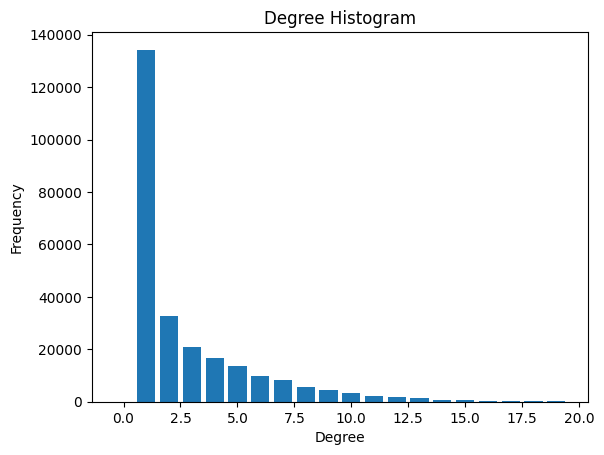

In [15]:
plt.bar(list(x for x in range(len(deg_hist[:20]))), deg_hist[:20], align='center')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

Esetleg latvanyosabb ha azt mondjuk hogy kizárjuk az 1 fokszámot, merthogy az csak 1 ember javaslata/ 1 db javaslat (A többi 25 - nél nagyobb fokszám pedig nagyjából mind 0,1,2,3 gyakoriságú)

^- Ez nem igazán így van. A degree-k itt azt jelentik, hogy egy adott MEP hány emberrel kollaborált.

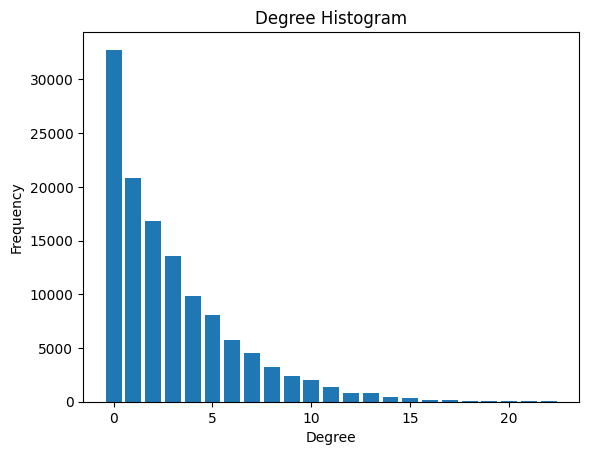

In [16]:
plt.bar(list(x for x in range(len(deg_hist[2:25]))), deg_hist[2:25], align='center')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [17]:
### melyik ország politikusai csináltak többet?

contribs_by_country = {}

for node in mep_social_network:
    curr_country = getMEPData("MEPName", node)["MemberState"]
    if curr_country not in contribs_by_country:
        contribs_by_country[curr_country] = 0
    contribs_by_country[curr_country] += mep_social_network.degree(node)

print(contribs_by_country)

{'Czechia': 1020, 'Poland': 2531, 'France': 4243, 'Netherlands': 1941, 'Slovakia': 1201, 'Romania': 2497, 'Spain': 3853, 'Croatia': 636, 'Greece': 1092, 'Portugal': 1406, 'Italy': 3550, 'United Kingdom': 268, 'Belgium': 1411, 'Germany': 5539, 'Finland': 859, 'Bulgaria': 1260, 'Ireland': 806, 'Hungary': 1135, 'Sweden': 1613, 'Malta': 614, 'Austria': 1272, 'Slovenia': 760, 'Latvia': 426, 'Cyprus': 502, 'Luxembourg': 623, 'Lithuania': 541, 'Estonia': 423, 'Denmark': 955, '': 175}


Az üres string ország politikusai nem tudom mit reprezentálnak.

TODO: ebből ábrát kéne csinálni, szépet, ami mutatja hogy melyik ország politikusai mennyit adnak hozzá a bulihoz

In [18]:
del contribs_by_country[""] # kidobom az üres stringet mert bruh

In [19]:
## ugyanez csak normáljuk az adatsort az országok populációjával
contribs_by_country_per_million = { country : val*(10**6)/(getPopulationData(country)) for country, val in contribs_by_country.items()}
print(contribs_by_country_per_million)

{'Czechia': 96.91978472025387, 'Poland': 66.54201672210608, 'France': 65.00773703915328, 'Netherlands': 110.34257247250133, 'Slovakia': 221.22785326827773, 'Romania': 131.04987111504965, 'Spain': 81.28555135295402, 'Croatia': 164.26328304965634, 'Greece': 104.67308783021028, 'Portugal': 135.93648150364697, 'Italy': 60.322119779781104, 'United Kingdom': 4.001194386383995, 'Belgium': 121.80585510645365, 'Germany': 66.54482680107976, 'Finland': 154.38616671189817, 'Bulgaria': 193.25778794375094, 'Ireland': 156.53102392458234, 'Hungary': 116.1391934885103, 'Sweden': 153.30432114793666, 'Malta': 1181.764640216182, 'Austria': 139.68618488257246, 'Slovenia': 360.6716085004603, 'Latvia': 225.01311255990447, 'Cyprus': 546.7813963620521, 'Luxembourg': 965.2973286209883, 'Lithuania': 192.47456471752668, 'Estonia': 317.6095339924795, 'Denmark': 160.97348673966155}


In [20]:
contribs_by_country_per_mep = { country : val/(getNumberOfMEPs(country)) for country, val in contribs_by_country.items()}
print(contribs_by_country_per_mep)

{'Czechia': 48.57142857142857, 'Poland': 49.627450980392155, 'France': 57.33783783783784, 'Netherlands': 74.65384615384616, 'Slovakia': 92.38461538461539, 'Romania': 78.03125, 'Spain': 66.43103448275862, 'Croatia': 57.81818181818182, 'Greece': 52.0, 'Portugal': 66.95238095238095, 'Italy': 48.63013698630137, 'United Kingdom': 3.671232876712329, 'Belgium': 67.19047619047619, 'Germany': 57.697916666666664, 'Finland': 66.07692307692308, 'Bulgaria': 74.11764705882354, 'Ireland': 73.27272727272727, 'Hungary': 54.04761904761905, 'Sweden': 80.65, 'Malta': 102.33333333333333, 'Austria': 70.66666666666667, 'Slovenia': 95.0, 'Latvia': 53.25, 'Cyprus': 83.66666666666667, 'Luxembourg': 103.83333333333333, 'Lithuania': 49.18181818181818, 'Estonia': 70.5, 'Denmark': 73.46153846153847}


In [21]:
### melyik EP group politikusai csináltak többet?

contribs_by_epgroup = {}

for node in mep_social_network:
    curr = getMEPData("MEPName", node)["EPGroup"]
    if curr not in contribs_by_epgroup:
        contribs_by_epgroup[curr] = 0
    contribs_by_epgroup[curr] += mep_social_network.degree(node)
del contribs_by_epgroup[""]
print(contribs_by_epgroup)

{'EPP': 13384, 'ECR': 2118, 'ID': 2090, 'Greens/EFA': 2288, 'RE': 8995, 'S&D': 11672, 'NI': 614, 'GUE/NGL': 1816}


In [22]:
## ok és akkor representative-enként?

contribs_by_epgroup_per_mep = { epgroup : val/(getNumberOfMEPs_by_epgroup(epgroup)) for epgroup, val in contribs_by_epgroup.items()}
print(contribs_by_epgroup_per_mep)

{'EPP': 73.53846153846153, 'ECR': 34.16129032258065, 'ID': 28.63013698630137, 'Greens/EFA': 30.91891891891892, 'RE': 83.28703703703704, 'S&D': 75.79220779220779, 'NI': 11.37037037037037, 'GUE/NGL': 44.292682926829265}


In [23]:
### melyik évben mennyit dolgoztak?
### ez jelen pillanatban nem működik :(

contribs_by_year = {}

for node in myGraph.nodes():
    if type(node) == int: # ez egy nagyon maszek módja hogy csak az amendmenteket nézzük
        if node[1].year not in contribs_by_year:
            contribs_by_year[node[1].year] = 0
    print(node)
        #contribs_by_year[node[1].year] += myGraph.degree(node)
    #    contribs_by_year[node[1].year] += 1
        
#contribs_by_year

TypeError: 'int' object is not subscriptable

Nem igazán látszik se a COVID se az ukrajnai háború hatása a kontribúciók számában.

## MEP_SOCIAL_NETWORK

In [24]:
mep_social_network

In [25]:
print(f"Some information about this graph:\n"
        f"Number of nodes: {nx.number_of_nodes(mep_social_network)}\n"
        f"Number of edges: {nx.number_of_edges(mep_social_network)}\n")

Some information about this graph:
Number of nodes: 754
Number of edges: 21576



# SPLITTING THE DATA

In [26]:
import datetime
time_intervals = [
    {
        "start" : pd.to_datetime(datetime.date(2019,7,24)),
        "end" : pd.to_datetime(datetime.date(2019,10,31))
    }, #0
    {
        "start" : pd.to_datetime(datetime.date(2019,11,1)),
        "end" : pd.to_datetime(datetime.date(2020,1,31))
    }, #1
    {
        "start" : pd.to_datetime(datetime.date(2020,2,1)),
        "end" : pd.to_datetime(datetime.date(2020,5,20))
    }, #2
    {
        "start" : pd.to_datetime(datetime.date(2020,5,21)),
        "end" : pd.to_datetime(datetime.date(2020,8,31))
    }, #3
    {
        "start" : pd.to_datetime(datetime.date(2020,9,1)),
        "end" : pd.to_datetime(datetime.date(2020,11,30))
    }, #4
    {
        "start" : pd.to_datetime(datetime.date(2020,12,1)),
        "end" : pd.to_datetime(datetime.date(2021,3,3))
    }, #5
    {
        "start" : pd.to_datetime(datetime.date(2021,3,4)),
        "end" : pd.to_datetime(datetime.date(2021,5,31))
    }, #6
    {
        "start" : pd.to_datetime(datetime.date(2021,6,1)),
        "end" : pd.to_datetime(datetime.date(2021,8,31))
    }, #7
    {
        "start" : pd.to_datetime(datetime.date(2021,9,1)),
        "end" : pd.to_datetime(datetime.date(2021,11,30))
    }, #8
    {
        "start" : pd.to_datetime(datetime.date(2021,12,1)),
        "end" : pd.to_datetime(datetime.date(2022,2,23))
    }, #9
    {
        "start" : pd.to_datetime(datetime.date(2022,2,24)),
        "end" : pd.to_datetime(datetime.date(2022,5,31))
    }, #10
    {
        "start" : pd.to_datetime(datetime.date(2022,6,1)),
        "end" : pd.to_datetime(datetime.date(2022,9,5))
    } #11
]

for i in time_intervals:
    i["length"] = i["end"] - i["start"]
    
print(time_intervals)

[{'start': Timestamp('2019-07-24 00:00:00'), 'end': Timestamp('2019-10-31 00:00:00'), 'length': Timedelta('99 days 00:00:00')}, {'start': Timestamp('2019-11-01 00:00:00'), 'end': Timestamp('2020-01-31 00:00:00'), 'length': Timedelta('91 days 00:00:00')}, {'start': Timestamp('2020-02-01 00:00:00'), 'end': Timestamp('2020-05-20 00:00:00'), 'length': Timedelta('109 days 00:00:00')}, {'start': Timestamp('2020-05-21 00:00:00'), 'end': Timestamp('2020-08-31 00:00:00'), 'length': Timedelta('102 days 00:00:00')}, {'start': Timestamp('2020-09-01 00:00:00'), 'end': Timestamp('2020-11-30 00:00:00'), 'length': Timedelta('90 days 00:00:00')}, {'start': Timestamp('2020-12-01 00:00:00'), 'end': Timestamp('2021-03-03 00:00:00'), 'length': Timedelta('92 days 00:00:00')}, {'start': Timestamp('2021-03-04 00:00:00'), 'end': Timestamp('2021-05-31 00:00:00'), 'length': Timedelta('88 days 00:00:00')}, {'start': Timestamp('2021-06-01 00:00:00'), 'end': Timestamp('2021-08-31 00:00:00'), 'length': Timedelta('91

In [27]:
ENTIRE_DATASET["Date"] = pd.to_datetime(ENTIRE_DATASET["Date"], format = "%d/%m/%Y")

In [28]:
split_data = []

for i in time_intervals:
    split_data.append(ENTIRE_DATASET[( ENTIRE_DATASET["Date"] >= i["start"])
                                     & ( ENTIRE_DATASET["Date"] <= pd.to_datetime(i["end"]))])

print(split_data)

[      AmendmentID Committee          Dossier       Date         PENumber  \
0          892323      ENVI  2019/2028 (BUD) 2019-07-24  PE639.804v01-00   
1          880086      ENVI  2019/2028 (BUD) 2019-07-24  PE639.804v01-00   
2          885326      ENVI  2019/2028 (BUD) 2019-07-24  PE639.804v01-00   
3          891589      ENVI  2019/2028 (BUD) 2019-07-24  PE639.804v01-00   
4          881777      ENVI  2019/2028 (BUD) 2019-07-24  PE639.804v01-00   
...           ...       ...              ...        ...              ...   
6286       893462      AFET  2019/2125 (INI) 2019-10-28  PE642.989v01-00   
6287       885945      AFET  2019/2125 (INI) 2019-10-28  PE642.989v01-00   
6288       885945      AFET  2019/2125 (INI) 2019-10-28  PE642.989v01-00   
6289       885945      AFET  2019/2125 (INI) 2019-10-28  PE642.989v01-00   
6290       892316      AFET  2019/2125 (INI) 2019-10-28  PE642.989v01-00   

      DocumentType OfficialMEPID              MEPName  MemberState  \
0     DraftOpini

In [29]:
s = 0
for i in split_data:
    x = len(i)
    print(x)
    s += x
print(f"SUM = {s}")

6291
18590
52589
71793
85737
70345
64459
75077
51429
105180
86629
62853
SUM = 750972


^- Ennyi adatpontunk van intervallumonként. Nekem balanceoltnak tűnik őszintén szólva.

Most megcsináljuk basically ugyanazt az analízist mint fönt, csak minden intervallumra külön.

In [30]:
by_country = {}
by_polgroup = {}
for mep in meps_who_did_something_in_all_intervals:
    curr_country = getMEPData("MEPName", mep)["MemberState"]
    curr_polgroup = getMEPData("MEPName", mep)["EPGroup"]
    if curr_country not in by_country:
        by_country[curr_country] = 0
    if curr_polgroup not in by_polgroup:
        by_polgroup[curr_polgroup] = 0
    by_country[curr_country] += 1
    by_polgroup[curr_polgroup] += 1

print(by_country)
print(by_polgroup)
    

NameError: name 'meps_who_did_something_in_all_intervals' is not defined

In [ ]:
for i in split_data:
    contribs_by_country = {}
    for node in mep_social_network:
        curr_country = getMEPData("MEPName", node)["MemberState"]
        if curr_country not in contribs_by_country:
            contribs_by_country[curr_country] = 0
        contribs_by_country[curr_country] += mep_social_network.degree(node)

In [31]:
socnetworkdegree = pd.DataFrame(mep_social_network.degree)
top10degree = socnetworkdegree.sort_values(1, ascending=False)[0:11]
top10degree

,0,1
278,Hilde VAUTMANS,183
499,#N/A,175
191,Karen MELCHIOR,173
541,Marc ANGEL,169
30,Olivier CHASTEL,167
519,Łukasz KOHUT,166
121,Michal ŠIMEČKA,160
319,Michal WIEZIK,152
118,Ramona STRUGARIU,151
227,Petras AUŠTREVIČIUS,151


In [32]:
for i in top10degree.values:
    print(i[0], getMEPData("MEPName", i[0])["MemberState"], getMEPData("MEPName", i[0])["EPGroup"], i[1])

Hilde VAUTMANS Belgium RE 183
#N/A   175
Karen MELCHIOR Denmark RE 173
Marc ANGEL Luxembourg S&D 169
Olivier CHASTEL Belgium RE 167
Łukasz KOHUT Poland S&D 166
Michal ŠIMEČKA Slovakia RE 160
Michal WIEZIK Slovakia EPP 152
Ramona STRUGARIU Romania RE 151
Petras AUŠTREVIČIUS Lithuania RE 151
Maria WALSH Ireland EPP 146


In [33]:
from functions import *

In [34]:
def pandasToLatex(df):
    o = ""
    for i in df:

        o += f'{i[0]} & {getMEPData("MEPName", i[0])["MemberState"]} & {getMEPData("MEPName", i[0])["EPGroup"]} & {i[1]} \\\\ \n'
    #COUNTRY_ABBREV
    return o


In [35]:
print(pandasToLatex(top10degree.values))

Hilde VAUTMANS & Belgium & RE & 183 \\ 
#N/A &  &  & 175 \\ 
Karen MELCHIOR & Denmark & RE & 173 \\ 
Marc ANGEL & Luxembourg & S&D & 169 \\ 
Olivier CHASTEL & Belgium & RE & 167 \\ 
Łukasz KOHUT & Poland & S&D & 166 \\ 
Michal ŠIMEČKA & Slovakia & RE & 160 \\ 
Michal WIEZIK & Slovakia & EPP & 152 \\ 
Ramona STRUGARIU & Romania & RE & 151 \\ 
Petras AUŠTREVIČIUS & Lithuania & RE & 151 \\ 
Maria WALSH & Ireland & EPP & 146 \\ 



Closeness centrality

In [40]:
closeness_centrality_dict = pd.DataFrame.from_dict(nx.closeness_centrality(mep_social_network), orient="index")

In [46]:
closeness_centrality_dict.sort_values(0, ascending=False)[0:11]

,0
Hilde VAUTMANS,0.543362
#N/A,0.535383
Sophia in 't VELD,0.526492
Petras AUŠTREVIČIUS,0.526112
Maria GRAPINI,0.521223
Fabio Massimo CASTALDO,0.521223
Łukasz KOHUT,0.517892
Maria da Graça CARVALHO,0.516790
Karen MELCHIOR,0.516059
Marc ANGEL,0.513877


Homophily

In [47]:
## homophily = sum( (E - I)/(E + I)  ), ahol E = external, I = internal